## Project 4:  &nbsp; Phylogenetic Inference

##### Due Friday May 27

If two or more people are working on this project enter each person's name here:
* Name:
* Name:
* Name:

Note: only one person needs to submit the project via Canvas

### Distance Matrix 

The code cell below contains the definition of a DistanceMatrix class you can use for this project.  An instance of this class is a 2D symmetric matrix that represents the "distance" between all pairs of set of items.  What the items are, and how the distances are measured, are defined outside the class; this matrix just provides a way to manage the distances.

A new object is created by passing the constructor a single integer `n`, e.g.
```
m = DistanceMatrix(10)
```
creates a 10 x 10 matrix.  Method defined for the matrix:
* call `len(m)` to get the size of the matrix
* access an item by location: `m[i,j]` where `i` and `j` are integer indices between 0 and `n`-1
* use assignment `m[i,j] = x` to assign a value to a cell; note that since the matrix is symmetric this automatically assigns `m[j,i]` also
* call `m.argmin()` to get the `(i,j)` coordinates of the shortest distance in the matrix
* delete an item by calling `del m[i]`
* call `m.extend()` to add a new row of values (all initialized to 0)

In [1]:
import seaborn as sns

/Users/hrnmy/anaconda3/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
class DistanceMatrix:
    def __init__(self, n, labels=None):
        self._array = [ [0]*i for i in range(n) ]
        self._names = labels if labels is not None else [ str(i) for i in range(n) ]
        
    def __repr__(self):
        header = ' '*5 + '{:^6}'*len(self._array)
        content = '{:<5}' + '{:6.2f}'*len(self._array)
        # res = [ header.format(*range(len(self._array))) ]
        res = [ header.format(*list(map(lambda s: s[0:4], self._names))) ]
        for i in range(len(self._array)):
            row = [self[i,j] for j in range(len(self._array))]
            res.append(content.format(self._names[i][0:4], *row))
        return '\n'.join(res)
    
    def __len__(self):
        return len(self._array)
        
    def __getitem__(self, loc):
        i, j = DistanceMatrix._coords(loc)
        return 0.0 if i == j else self._array[i][j]

    def __setitem__(self, loc, x):
        i, j = DistanceMatrix._coords(loc)
        if i != j:
            self._array[i][j] = x
        
    def __delitem__(self, j):
        for i in range(j+1, len(self._array)):
            del self._array[i][j]
        del self._array[j]
        del self._names[j]
        
    def argmin(self):
        if len(self._array) < 2:
            return None
        res = [1, 0, self[1,0]]
        for i in range(2, len(self._array)):
            j, val = min(enumerate(self._array[i]), key=lambda x: x[1])
            if val < res[2]:
                res = [i, j, val]
        return (res[0], res[1])
    
    def get_name(self, i):
        return self._names[i]
    
    def set_name(self, i, s):
        self._names[i] = s
    
    def extend(self, name=None):
        self._array.append([0]*len(self._array))
        self._names.append(name if name is not None else str(len(self._array)-1))
        
    def heatmap(self):
        sns.heatmap(self._array)
       
    @staticmethod
    def _coords(loc):
        i, j = loc
        return (i, j) if i > j else (j, i)
        

Here is a short demonstration of how to create and use a DistanceMatrix object.  The matrix will be 7x7.  Note that the diagonals are 0 by default so they don't need to be specified.

In [2]:
# Example from Rich Edwards (http://www.southampton.ac.uk/~re1u06/teaching/upgma/)

d = [
    [],
    [19],
    [27, 31],
    [ 8, 18, 26],
    [33, 36, 41, 31],
    [18,  1, 32, 17, 35],
    [13, 13, 29, 14, 28, 12],
]

edwards = DistanceMatrix(len(d), list('ABCDEFG'))

for i, row in enumerate(d):
    for j in range(len(row)):
        edwards[i,j] = row[j]

In [3]:
edwards

       A     B     C     D     E     F     G   
A      0.00 19.00 27.00  8.00 33.00 18.00 13.00
B     19.00  0.00 31.00 18.00 36.00  1.00 13.00
C     27.00 31.00  0.00 26.00 41.00 32.00 29.00
D      8.00 18.00 26.00  0.00 31.00 17.00 14.00
E     33.00 36.00 41.00 31.00  0.00 35.00 28.00
F     18.00  1.00 32.00 17.00 35.00  0.00 12.00
G     13.00 13.00 29.00 14.00 28.00 12.00  0.00

This call shows the shortest distance (smallest non-zero value) is in row 5, column 1:

In [4]:
edwards.argmin()

(5, 1)

These calls remove items 1 and 5 from the matrix.  Note that removing a row also removes the corresponding column from the other rows.

In [5]:
del edwards[5]
del edwards[1]
print(edwards)

       A     C     D     E     G   
A      0.00 27.00  8.00 33.00 13.00
C     27.00  0.00 26.00 41.00 29.00
D      8.00 26.00  0.00 31.00 14.00
E     33.00 41.00 31.00  0.00 28.00
G     13.00 29.00 14.00 28.00  0.00


This call adds a new row, e.g. for adding distances to a new node:

In [6]:
edwards.extend('BF')
print(edwards)

       A     C     D     E     G     BF  
A      0.00 27.00  8.00 33.00 13.00  0.00
C     27.00  0.00 26.00 41.00 29.00  0.00
D      8.00 26.00  0.00 31.00 14.00  0.00
E     33.00 41.00 31.00  0.00 28.00  0.00
G     13.00 29.00 14.00 28.00  0.00  0.00
BF     0.00  0.00  0.00  0.00  0.00  0.00


### Project 1:  &nbsp; Distance Matrix Based on k-mers

Fill in the body of the `kmer_distance` function.  It takes two arguments:  the name of a FASTA file and an integer `k`.  The function should return a DistanceMatrix object with all pairwise distances between the sequences in the file.  

The distance between two sequences is defined by the number of _k_-mers they have in common.  First compute _k_-mer sets $S_i$ and $S_j$ for sequences $i$ and $j$.  Then $ A = S_i \cup S_j$ is the set of _k_-mers found in either sequence, and $C = S_i \cap S_j$ is the set of _k_-mers they have in common.  The distance between the sequences is then

$$
d_{i,j} = \frac{| \, A \,| \;-\; | \,C\, |}{|\, A\, |}
$$


To find the _k_-mers in a sequence you can reuse the code you wrote for the de Bruijn graph project or use the `iter_kmers` function in the Sequence class in `scikit-bio`.  Comment out the following code cell if you don't want to use `scikit-bio`.

**Note:** &nbsp; It's not required for this project, but if you get the name of a sequence from the defline and pass it to the `set_name` method for the matrix the name will be printed as a row and column label, and later displayed as part of the drawing of the phylogenetic tree.

In [2]:
import skbio
import numpy as np

/Users/hrnmy/anaconda3/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


##### Documentation and Code

use skbio to read fasta file into a collection of BiologicalSequence objects, create distance matrix object of size n with labels from sequence id's. Use double for loop to compare each sequence to each other to fill matrix by comparing all kmers to the overlapping kmers between seq 1 and seq 2 (overlapping kmers found using numpy's intersect function).

In [3]:
def kmer_distance(filename, k):
    # YOUR CODE HERE
    fasta_file = skbio.SequenceCollection.read(filename)
    names = fasta_file.ids()
    dm = DistanceMatrix(len(names), names)
    
    for row, seq1 in enumerate(fasta_file):
        for col, seq2 in enumerate(fasta_file):
            kmer_2 = np.array([str(k) for k in seq2.iter_kmers(k)])
            kmer_1 = np.array([str(k) for k in seq1.iter_kmers(k)])
            
            combined = len(kmer_1) + len(kmer_2)
            intersect = len(np.intersect1d(kmer_1, kmer_2))

            score = (combined - intersect)/combined
            
            dm[row, col] = score
        
    return dm

##### Autograder Tests 

The autograder will run these tests in the order shown.  Feel free to use these tests yourself, but do not alter the cells or reorder them.

In [52]:
m = kmer_distance('hbb.fasta', 2)
print(m)

      Huma  Gori  Spid  Hors  Deer  Pig   Cow   Gull  Trou  Rock  Lamp  Sea_ 
Huma   0.00  0.61  0.64  0.70  0.74  0.68  0.70  0.75  0.81  0.79  0.85  0.85
Gori   0.61  0.00  0.64  0.70  0.75  0.68  0.70  0.75  0.81  0.79  0.85  0.85
Spid   0.64  0.64  0.00  0.70  0.74  0.68  0.70  0.74  0.82  0.81  0.85  0.85
Hors   0.70  0.70  0.70  0.00  0.76  0.71  0.73  0.75  0.84  0.82  0.89  0.86
Deer   0.74  0.75  0.74  0.76  0.00  0.75  0.74  0.79  0.83  0.82  0.86  0.85
Pig    0.68  0.68  0.68  0.71  0.75  0.00  0.70  0.75  0.82  0.80  0.86  0.83
Cow    0.70  0.70  0.70  0.73  0.74  0.70  0.00  0.77  0.83  0.81  0.84  0.85
Gull   0.75  0.75  0.74  0.75  0.79  0.75  0.77  0.00  0.79  0.79  0.85  0.83
Trou   0.81  0.81  0.82  0.84  0.83  0.82  0.83  0.79  0.00  0.78  0.85  0.84
Rock   0.79  0.79  0.81  0.82  0.82  0.80  0.81  0.79  0.78  0.00  0.85  0.85
Lamp   0.85  0.85  0.85  0.89  0.86  0.86  0.84  0.85  0.85  0.85  0.00  0.84
Sea_   0.85  0.85  0.85  0.86  0.85  0.83  0.85  0.83  0.84  0.8

In [ ]:
m.heatmap()

In [183]:
assert len(m) == 12

In [184]:
assert m.argmin() == (1,0)

### Project 2: &nbsp; UPGMA 

Fill in the body of the `upgma` function so it produces a phylogenetic tree.  The only argument passed to the functon is a DistanceMatrix object.  The return value should be the Newick string representation of the tree (although see the list of optional projects below for alternatives). 

The unit tests will be based on the same data used to illustrate the DistanceMatrix class.  This is the tree you should get back:
```
>>> print(upgma(edwards))
(E:17.00,((((F:0.50,B:0.50):5.75,G:6.25):2.00,(D:4.00,A:4.00):4.25):6.25,C:14.50):2.50)
```

**Note:** &nbsp; the lecture notes for May 16--20 have several hints and suggestions for how to implement this function.  You can also get some ideas from _IAB_.

##### Documentation and Code

Keep track of counts of each sequence and heights of each group with a dictionary. Use while loop until only one group in matrix left, set node_1 and node_2 to each minimum value in the matrix, then find the mean of those two distances. Set branch length from group one to group two by subtracting mean branch distance from connected groups. Set row labels as the Newick string and use those to create new entries in counts and height dictionaries while deleting old values. In for loop find distance between new group and all non-node_1, node_2 members in matrix.

Function returns Newick string produced from adding matrix labels together.

In [4]:
def upgma(matrix):
    # YOUR CODE HERE
    nodes = [matrix.get_name(i) for i in range(len(matrix))]
    counts = {n: 1 for n in nodes}
    heights = {n: 0 for n in nodes}
    
    while len(matrix) > 1:
        size_m = len(matrix)
        
        min_d = matrix.argmin()
        node_1 = matrix.get_name(min_d[0])
        node_2 = matrix.get_name(min_d[1])
        
        joined_score = matrix[(min_d)]/2
        heights[node_1] = joined_score - heights[node_1]
        heights[node_2] = joined_score - heights[node_2]
        joined_name = ('({}: {}, {}: {})'.format(node_1, heights[node_1], node_2, heights[node_2]))
        
        counts[joined_name] = counts[node_1] + counts[node_2]
        heights[joined_name] = joined_score
        
        matrix.extend(joined_name)
        
        for k in range(size_m):
            if k == min_d[0] or k == min_d[1]:
                continue
            else:
                i = counts[node_1]
                j = counts[node_2]
                matrix[k,size_m] = (i/(i+j))*matrix[k,min_d[0]] + (j/(i+j))*matrix[k,min_d[1]]
        
        del matrix[min_d[0]], matrix[min_d[1]]
        del counts[node_1], counts[node_2]
        del heights[node_1], heights[node_2]
        
        
    return matrix.get_name(0) + ';'

##### Autograder Tests 

The autograder will run these tests in the order shown.  Feel free to use these tests yourself, but do not alter the cells or reorder them.

**NOTE:** &nbsp; the autograder will run on a system that has `scikit-bio` installed so it can use that library's TreeNode class to test your output.  If you do not have `scikit-bio` just make sure your string looks like the one shown above and it will pass the unit tests.

In [5]:
distances = [
    [],
    [19],
    [27, 31],
    [ 8, 18, 26],
    [33, 36, 41, 31],
    [18,  1, 32, 17, 35],
    [13, 13, 29, 14, 28, 12],
]

edwards = DistanceMatrix(len(distances), list('ABCDEFG'))

for i, row in enumerate(distances):
    for j in range(len(row)):
        edwards[i,j] = row[j]
        
newick = upgma(edwards)

In [6]:
print(newick)

(((((F: 0.5, B: 0.5): 5.75, G: 6.25): 2.0, (D: 4.0, A: 4.0): 4.25): 6.25, C: 14.5): 2.5, E: 17.0)


In [7]:
from skbio import TreeNode
from io import StringIO

In [8]:
tree = TreeNode.read(StringIO(newick+'root;'))
print(tree.ascii_art())

                                                  /-F
                                        /--------|
                              /--------|          \-B
                             |         |
                    /--------|          \-G
                   |         |
                   |         |          /-D
          /--------|          \--------|
         |         |                    \-A
-root----|         |
         |          \-C
         |
          \-E


In [78]:
assert len(list(tree.tips())) == len(distances)

In [79]:
children = tree.children
assert len(children) == 2

In [80]:
ebranch, longbranch = children
if ebranch.name != 'E':
    ebranch, longbranch = longbranch, ebranch

assert ebranch.length == 17.0
assert longbranch.length == 2.5

### Project 3: &nbsp; Globin Tree 

Use your `kmer_distance` function to make a distance matrix based on the 12 globin sequences in `hbb.fasta` and then create a phylogeny of the sequences by passing the matrix to `upgma`.

Use the `draw` method in Biopython's Phylo module or the `ete3` module described in Section 2.4.5 of _IAB_ to draw a picture of the tree.  You should see something like the graphic below.

**Note:** &nbsp; You can use a different graphics package if you want.  In case I don't have the same software on my system e-mail the drawing (PNG, SVG, or PDF) to me when you upload your notebook to Canvas.

In [11]:
from IPython.display import Image
Image(url='http://www.cs.uoregon.edu/Classes/16S/cis454/graphics/projects/globin.png')

##### Documentation and Code

Describe what you did to draw your tree in this markdown cell, and put the code you used to generate the drawing in the code cell below it.  There are no autograder test cells for this part of the project.

Used ete3 to draw up a tree and save to a .png file

In [6]:
from ete3 import Tree, TreeStyle

In [7]:
m = kmer_distance('hbb.fasta', 2)
newick_hbb = upgma(m)

In [9]:
newick_hbb

'((Sea_Cucumber: 0.4180327868852459, Lamprey: 0.4180327868852459): 0.007546929241904365, ((Rock_Cod: 0.3879310344827586, Trout: 0.3879310344827586): 0.01800442192309476, (((((((Gorilla: 0.3065068493150685, Human: 0.3065068493150685): 0.013939886080120478, Spider_Monkey: 0.320446735395189): 0.020148516806888672, Pig: 0.34059525220207765): 0.008714197744229435, Cow: 0.3493094499463071): 0.004595586441431321, Horse: 0.3539050363877384): 0.019581108971915506, Deer: 0.3734861453596539): 0.005591533264126203, Gull: 0.3790776786237801): 0.026857777782073267): 0.01964425972129691);'

In [9]:
# YOUR CODE HERE
t = Tree(newick_hbb)
ts = TreeStyle()
ts.show_branch_length = True
t.render('newick.png', w = 600, tree_style = ts)

{'faces': [[174.71505267123428,
   186.44695186919938,
   209.36927799445428,
   197.99836031027272,
   11,
   '0.0046'],
  [317.38650915124384,
   7.219630275670838,
   417.0174069555015,
   21.658890827012513,
   2,
   'Sea_Cucumber'],
  [284.176209883158,
   2.887852110268335,
   313.05473098584133,
   14.439260551341675,
   2,
   '0.418'],
  [317.38650915124384,
   33.210299268085855,
   373.69962530147643,
   47.64955981942753,
   3,
   'Lamprey'],
  [284.176209883158,
   28.87852110268335,
   313.05473098584133,
   40.42992954375669,
   3,
   '0.418'],
  [50.537411929695864,
   262.9975941359217,
   85.19163725291588,
   274.54900257699506,
   8,
   '0.0269'],
  [472.2441160309013,
   189.15431322257595,
   492.4590808027796,
   203.59357377391763,
   18,
   'Pig'],
  [439.03381676281543,
   184.82253505717344,
   467.9123378654988,
   196.37394349824677,
   18,
   '0.341'],
  [11.55140844107334,
   15.883186606475842,
   53.4252640399642,
   27.434595047549184,
   1,
   '0.00755

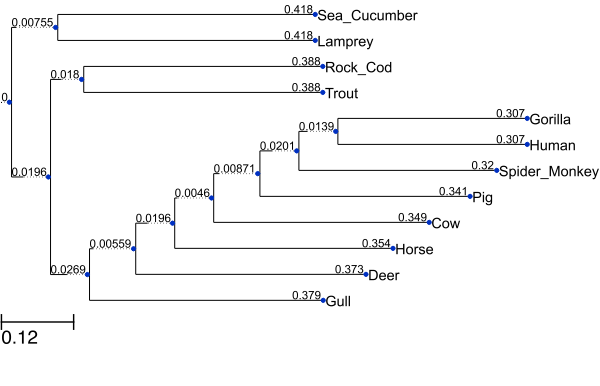

In [12]:
Image('newick.png')

### Extensions 

If you want to go beyond the basic project and do some more on your own here are some ideas to consider.

##### Art Contest 

Explore alternatives for drawing trees -- the libraries have commands to draw branches with different colors, include images of the organisms at the leaves, and much more.

Submit your results by e-mail, I'll post noteworthy images on Canvas.

##### Edit Distance

Instead of using _k_-mers to compute the distances between sequences implement the dynamic programming alignment algorithm based on edit distance, where increasing alignment scores indicate increasing distance, and use those values to create the distance matrix.

##### Heat Map

Add a method to the DistanceMatrix class to display a "heat map", a 2D grid where square `(i,j)` is colored according to the similarity of sequences `i` and `j` (_IAB_ uses this technique to show example distance matrices).

##### Neighbor Joining

Use the distance matrix to implement the Neighbor Joining algorithm (as outlined in the lecture notes).

##### Progressive Alignment 

Use the UPGMA or Neighbor-Joining trees as guide trees to implement progressive multiple alignment in the style of CLUSTALW.